In [23]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
import pandas as pd

In [8]:
def curve(x, a ,b, c):
    y = a + b*np.exp(-c*(x))
    return y

In [11]:
x = np.array([57.41, 55.19, 49.13, 177.8, 171.63, 148.6, 218.22, 218.9, 183, 263, 258.4, 223, 373.8, 345.84, 274])
y = np.array([0.31, 0.31, 0.31, 0.3, 0.3, 0.3, 0.29, 0.29, 0.29, 0.28, 0.28, 0.28, 0.27, 0.27, 0.27])

In [194]:
## Mean of values in all positions
x = np.array([np.mean([165.87, 144.87,139.14 ]), np.mean([177.8, 171.63, 148.6]), np.mean([218.22, 218.9, 183]), np.mean([263, 258.4, 223]), np.mean([373.8, 345.84, 274])])/1000
y = np.array([0.3276, 0.317, 0.3, 0.2855, 0.27])

In [4]:
## Touching glass positions
x = np.array([np.mean([165.87, 144.87]), np.mean([177.8, 171.63]), np.mean([218.22, 218.9]), np.mean([263, 258.4]), np.mean([373.8, 345.84])])/1000
y = np.array([0.3276, 0.317, 0.3, 0.286, 0.27])

In [173]:
x = np.array([np.mean([177.8, 171.63, 148.6]), np.mean([218.22, 218.9, 183]), np.mean([263, 258.4, 223]), np.mean([373.8, 345.84, 274])])/1000
y = np.array([0.317, 0.3, 0.2855, 0.27])

Text(0, 0.5, 'Teor de Etanol (%)')

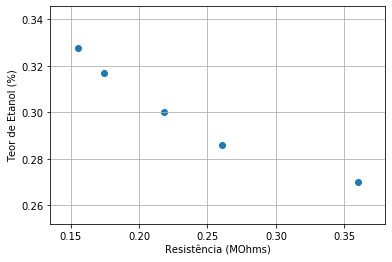

In [5]:
plt.scatter(x,y)
plt.grid()
plt.xlabel('Resistência (MOhms)')
plt.ylabel('Teor de Etanol (%)')

In [9]:
params, param_cov = curve_fit(curve, x, y)
params

array([0.25579478, 0.24802099, 7.98099304])

In [10]:
x_lin = np.linspace(140, 380, 40)/1000

In [204]:
x

array([0.15537 , 0.174715, 0.21856 , 0.2607  , 0.35982 ])

In [162]:
y

array([0.33  , 0.317 , 0.3   , 0.2855, 0.27  ])

In [190]:
x_lin

array([0.14      , 0.14615385, 0.15230769, 0.15846154, 0.16461538,
       0.17076923, 0.17692308, 0.18307692, 0.18923077, 0.19538462,
       0.20153846, 0.20769231, 0.21384615, 0.22      , 0.22615385,
       0.23230769, 0.23846154, 0.24461538, 0.25076923, 0.25692308,
       0.26307692, 0.26923077, 0.27538462, 0.28153846, 0.28769231,
       0.29384615, 0.3       , 0.30615385, 0.31230769, 0.31846154,
       0.32461538, 0.33076923, 0.33692308, 0.34307692, 0.34923077,
       0.35538462, 0.36153846, 0.36769231, 0.37384615, 0.38      ])

In [11]:
y_lin = curve(x_lin, *params)

Text(0, 0.5, 'Teor de Etanol (%)')

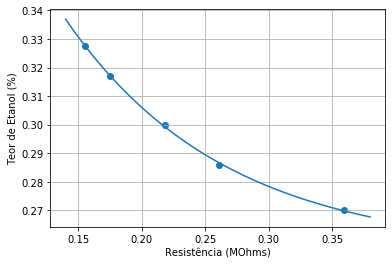

In [13]:
plt.plot(x_lin, y_lin)
plt.scatter(x, y)
plt.grid()
plt.xlabel('Resistência (MOhms)')
plt.ylabel('Teor de Etanol (%)')

In [14]:
medidas = np.array([curve(np.array([165.87, 144.87,139.14, 154.7, 154.89, 153.7, 153.66, 144.99, 158.03])/1000, *params),
                    curve(np.array([177.8, 171.63, 148.6, 170.92, 171.21, 156.3, 155.98, 139.92, 134.69])/1000, *params), 
                    curve(np.array([218.22, 218.9, 183, 213.88, 215.30, 209.12, 208.31, 171.32, 181.29])/1000, *params), 
                    curve(np.array([263, 258.4, 223, 255.34, 254.72, 241.08, 240.63, 212.32, 216.04])/1000, *params), 
                    curve(np.array([373.8, 357.96, 361, 325.01, 324.48, 265.02, 264.35, 345.84, 274])/1000, *params)])
np.round(medidas*100, 2)

array([[32.18, 33.38, 33.75, 32.8 , 32.78, 32.85, 32.86, 33.38, 32.61],
       [31.58, 31.88, 33.16, 31.92, 31.9 , 32.7 , 32.72, 33.7 , 34.04],
       [29.93, 29.9 , 31.34, 30.08, 30.03, 30.25, 30.28, 31.9 , 31.42],
       [28.62, 28.73, 29.76, 28.81, 28.83, 29.2 , 29.21, 30.14, 30.  ],
       [26.84, 27.  , 26.97, 27.43, 27.44, 28.57, 28.59, 27.15, 28.36]])

In [15]:
# STD per sample
stds = np.std(medidas*100, axis=1)
np.round(stds, 2)

array([0.45, 0.82, 0.72, 0.54, 0.67])

In [16]:
# Average STD across all samples
avg_std = np.mean(stds)
avg_std

0.6413357518288203

In [18]:
# STD per sample without average point estimation
std_real_avg = np.sqrt(np.sum((medidas - np.array([y]).T)**2, axis=1)/3)*100
std_real_avg

array([0.84233224, 2.14471083, 1.58766116, 1.47513176, 1.55778387])

In [19]:
# Average STD across all samples without average point estimation
avg_std_real_avg = np.mean(std_real_avg)
avg_std_real_avg

1.5215239706669252

In [20]:
2*avg_std_real_avg # 95% CI

3.0430479413338505

In [24]:
medidas_df = pd.DataFrame(medidas.T)
medidas_df.columns = ['32.7%', '31.7%', '30.0%', '28.6%', '27.0%']
medidas_df.head()

,32.7%,31.7%,30.0%,28.6%,27.0%
0,0.321798,0.315804,0.299257,0.286197,0.268351
1,0.333841,0.318833,0.299022,0.287334,0.270043
2,0.337493,0.331552,0.313364,0.297631,0.269702
3,0.327952,0.319191,0.300789,0.288113,0.274329
4,0.327843,0.319044,0.300282,0.288274,0.274407


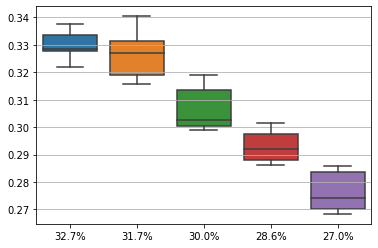

In [25]:
ax = sns.boxplot(data=medidas_df)
ax.grid(axis='y')